# Generalization Error

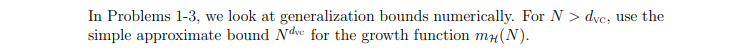

## Question 1:

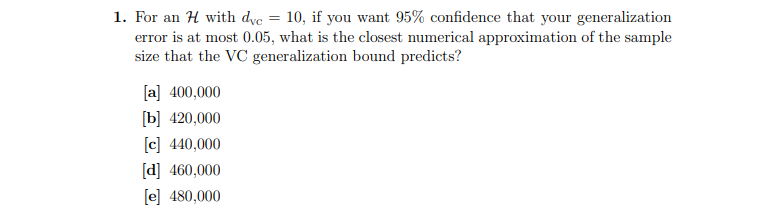

We can use the following result:

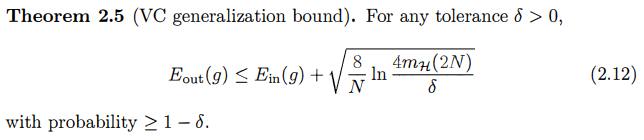

Using the substitution $\epsilon = E_{out}(g) - E_{in}(g)$ we can derive the following more useful result:

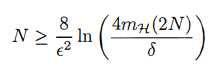

In Q1 we have: $\epsilon = 0.05, \delta = 0.05, d_{VC} = 10$

Substituting into the above we get:

\begin{align*}
N &\geq \frac{8}{0.05^2}\ln\left(\frac{4(2N)^{10}}{0.05}\right)\\
&= 3200\ln\left(80(2N)^{10}\right)\\
&= 3200\ln\left(80\cdot 2^{10} \cdot N^{10}\right)\\
&= 3200\left( \ln(80\cdot 2^{10}) +  \ln(N^{10}) \right)\\
&\approx 36203 + 32000\ln(N)\\
\end{align*}

Start with an initial guess of $N=1000$, substituting into the RHS we get the following sequence of iterative guesses:

\begin{align*}
N_0 &= 1000 \\
N_1 &= 257251\\
N_2 &= 434852\\
N_3 &= 451651\\
N_4 &= 452864\\
N_5 &= 452950\\
N_6 &= 452956\\
\end{align*}

Correct Answer: **D**

(Closest to 460,000)

## Question 2:

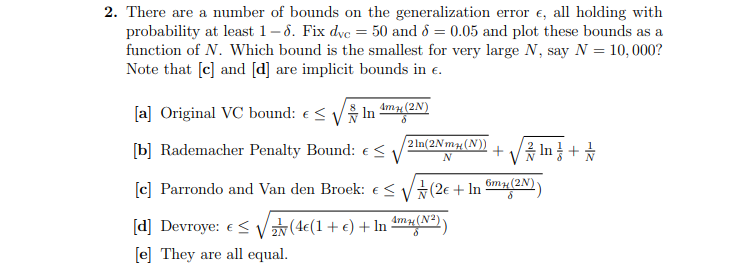

Substituting values into each bound:

**Original VC bound:**
$$
\epsilon \leq \sqrt{\frac{8}{10000} \cdot \ln\left( \frac{4\cdot (20000)^{50}}{0.05}\right) } = 0.632
$$


**Rademacher Penalty Bound:**

\begin{align*}
\epsilon &\leq \sqrt{\frac{2\cdot \ln(20000 \cdot (10000)^{50})}{10000}} + \sqrt{\frac{2}{10000}\ln\left(\frac{1}{0.05}\right)} + \frac{1}{10000}\\ 
&= 0.3067 + 0.0245 + 0.0001 \\
&= 0.331
\end{align*}

**Parrando and Van den Broek:**

Solve for $\epsilon$ to deal with implicit inequality:

$$
\epsilon = \frac{\frac{2}{N}\pm \sqrt{\frac{4}{N^2}-\frac{4}{N}\ln\left(\frac{6m_{\mathcal{H}}(2N)}{\delta}\right)}}{2}
$$

$$
\epsilon \leq \sqrt{\frac{1}{10000}\cdot\left(2\epsilon + \ln\left(\frac{6\cdot (20000)^{50}}{0.05}\right)\right)} = \frac{\sqrt{2\epsilon + 500}}{100}
$$

Can iteratively find solution:

\begin{align*}
\epsilon_0 &= 1 \\
\epsilon_1 &\approx 0.224\\
\epsilon_2 &\approx 0.224\\
\end{align*}

**Devroye:**

Solve for $\epsilon$ to deal with implicit inequality:

$$
\epsilon = \frac{4 \pm \sqrt{16-8(N-2)\ln\left(\frac{4m_{\mathcal{H}}(N^2)}{\delta}\right)}}{4(N-2)}
$$


$$
\epsilon \leq \sqrt{\frac{1}{20000}\left(4\epsilon(1+\epsilon) + \ln\left(\frac{4\cdot (100000000)^{50}}{0.05}\right)\right)} \approx \frac{\sqrt{4\epsilon(1+\epsilon) + 925}}{141.4}
$$

Can iteratively find solution:

\begin{align*}
\epsilon_0 &= 1 \\
\epsilon_1 &\approx 0.216\\
\epsilon_2 &\approx 0.215\\
\end{align*}

Correct Answer: **D** (0.215 smallest calculated quantity)

## Question 3:

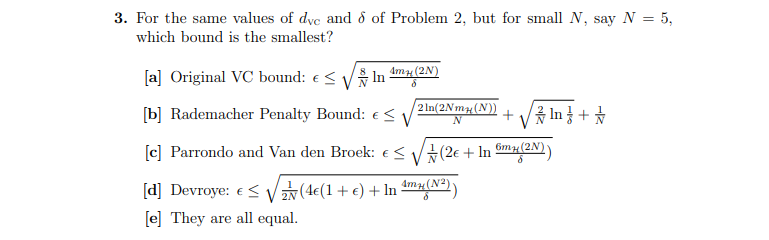

Repeat calculations above with $N=5$

**Original VC bound:**
$$
\epsilon \leq \sqrt{\frac{8}{5} \cdot \ln\left( \frac{4\cdot (10)^{50}}{0.05}\right) } = 13.82816
$$


**Rademacher Penalty Bound:**
$$
\epsilon \leq \sqrt{\frac{2\cdot \ln(10 \cdot (5)^{50})}{5}} + \sqrt{\frac{2}{5}\ln\left(\frac{1}{0.05}\right)} + \frac{1}{5} = 5.75411 + 1.09467 + 0.2 = 7.04878
$$
**Parrando and Van den Broek:**

Solve for $\epsilon$ to deal with implicit inequality:

$$
\epsilon = \frac{\frac{2}{5}\pm \sqrt{\frac{4}{5^2}-\frac{4}{5}\ln\left(\frac{6\cdot 5^{50}}{0.05}\right)}}{2}
$$

**Devroye:**

Solve for $\epsilon$ to deal with implicit inequality:

$$
\epsilon = \frac{4 \pm \sqrt{16-8(5-2)\ln\left(\frac{4\cdot 25^{50}}{0.05}\right)}}{4(5-2)}
$$

\begin{align*}
f(x) = y
\end{align*}


# Bias and Variance

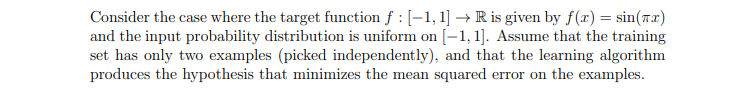

## Question 4:

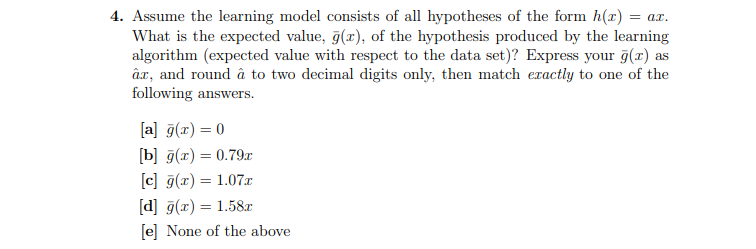

Given two points $(x_1,y_1)$ and $(x_2,y_2)$ we can derive an analytic expression for the squared error from a given hypothesis $h(x) = ax$:

$$
Error(a) = (y_1 - ax_1)^2 + (y_2 - ax_2)^2
$$

Differentiating and solving for $E'(a) = 0$ gives:

$$
a = \frac{x_1y_1 + x_2y_2}{x_1^2 + x_2^2}
$$

We can estimate $\hat{a}$ by generating many random points and averaging

In [70]:
import numpy as np

def a_funct(points):
    return (points[0]*points[2]+points[1]*points[3])/(points[0]**2 + points[1]**2)

N = 1000000 #number of trials

#generate many x_s
x_s = np.random.uniform(-1,1,(N,2))
y_s = np.sin(x_s*np.pi)
a_s = []

for row_num in range(N):
    row = list(np.concatenate((x_s[row_num],y_s[row_num]),axis=0))
    a_s.append(a_funct(row))
    
print(f'a hat averaged over {N} trials = {np.mean(a_s,axis=0)}')

a hat averaged over 1000000 trials = 1.428854718618305


Correct Answer: **E**

(Does not correspond to any of the options above.)

## Question 5:

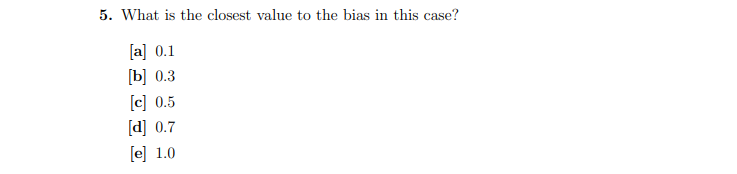

Recall that bias is defined to be the average squared error between the average hypothesis and the target function.

In [75]:
error_list = []
a_hat = np.mean(a_s,axis=0)

test_list = np.random.uniform(-1,1,(N,1))

a_list = test_list*a_hat #average hypothesis values
b_list = np.sin(test_list*np.pi) #sin values

c_list = (a_list-b_list)**2 #squared error values

print(f'bias averaged over {N} trials = {np.mean(c_list,axis=0)[0]}')

bias averaged over 1000000 trials = 0.2708559982700999


Correct Answer: **B**

## Question 6:

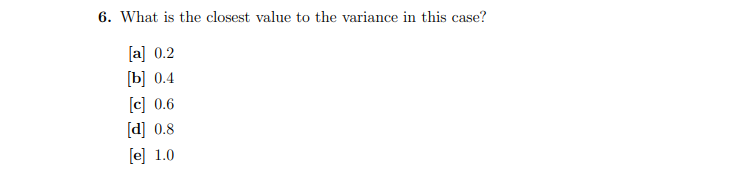

In [92]:
#calculating out of sample error

predicted_pts = np.multiply(np.array(a_s),test_list.T)
#predicted_sines = b_list

np.mean(np.square(predicted_pts.T-b_list))

0.5067412935851673

$$
E_{out} = \text{bias} + \text{variance} \implies 0.5067 = 0.2709 + \text{variance} \implies \text{variance} = 0.2358
$$

Correct Answer: **A** 

(variance calculated is closest to 0.2)

## Question 7:

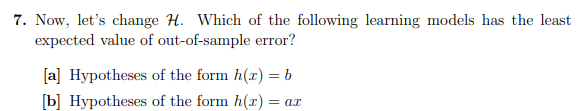
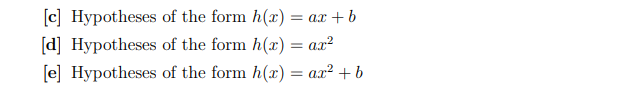

# VC Dimension

## Question 8:

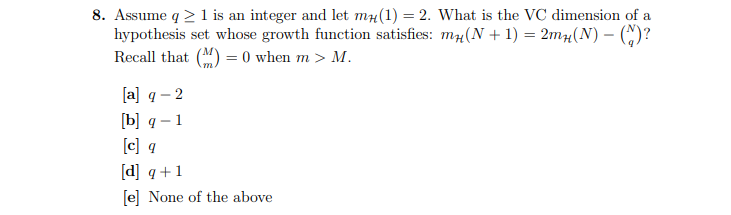

Correct Answer: **C**

By definition: the VC dimension of a hypothesis set $\mathcal{H}$ is the largest value of $N$ for which $m_{\mathcal{H}}(N) = 2^N$

In this case since ${k \choose q} = 0$ for $k<q$ the size of $m_{\mathcal{H}}(k)$ will double until $k = q$ and in this case we get:

$$
m_{\mathcal{H}}(q+1) = 2m_{\mathcal{H}}(q) - 1 \neq 2^{q+1}
$$

Thus the VC dimension must $q$

## Question 9:

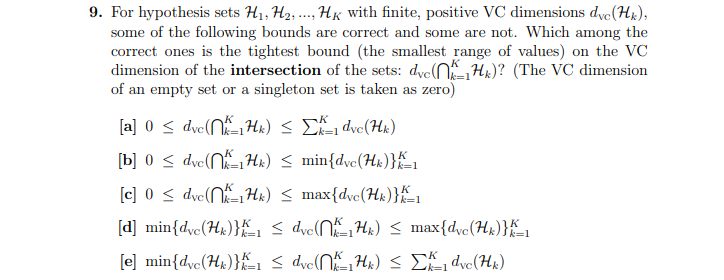

Correct Option: **B**

Lower bound cannot be the minimum since we assumed each $\mathcal{H}_k$ has positive VC dimension but the intersection may be trivial here so options left are A, B, C. 

The upper bound should be considered in the special case $\mathcal{H}_1 \subseteq \mathcal{H}_2$. Certainly the VC dimension in this case will be equal to the VC dimension of the smaller hypothesis set. 

## Question 10:

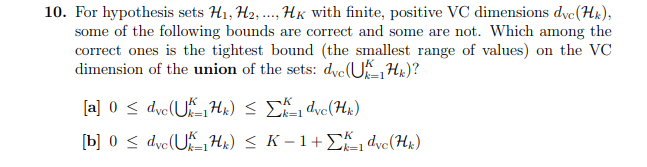

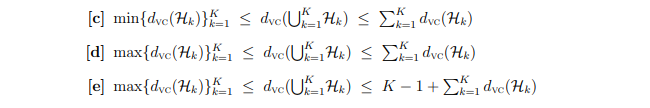

Correct Answer: **E**

For the lower bound we see from the special case $\mathcal{H}_1 \subseteq \mathcal{H}_2$ that if $\mathcal{H}_1$ shatters $k$ points and $\mathcal{H}_2$ shatters $l$ points then the union will certainly shatter $l$ points.

For the upper bound we go back to the definition. $d_{VC}(\mathcal{H}_1) = N$ means that **no** set of $N+1$ points can be shattered by $\mathcal{H}_1$. 

Additionally if $d_{VC}(\mathcal{H}_2) = M$ then **no** set of $M+1$ points can be shattered by $\mathcal{H}_2$. Combining these two facts we see that no set of size (N+1)+(M+1) can be shattered by $\mathcal{H}_1 \cup \mathcal{H}_2$, this the VC dimension in this case is **strictly** bounded above by $(N+1)+(M+1)$ and non-strictly bounded above by $(N+1)+(M+1) - 1$. Generalizing to the $K$-union we get a $K$ extra $+1$ terms (corresponding to the $+K$ term) and one $-1$ term on the upper bound. 